In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
filename = '/datasets/home/home-01/41/041/jeq004/streaming_provider_classifier_inside_vpn/data/out/model.pkl'

In [2]:
import os
os.getcwd()

'/home/jeq004/streaming_provider_classifier_inside_vpn/src/notebooks'

In [3]:
loaded_model = pickle.load(open(filename, 'rb'))

In [4]:
loaded_model.feature_importances_

array([0.12643439, 0.12833846, 0.0556225 , 0.16885874, 0.05267623,
       0.04759409, 0.082938  , 0.05728013, 0.04417374, 0.04326276,
       0.03032475, 0.04355072, 0.11894549])

In [5]:
# features = ['bytes_ratio',
#                 'count_ratio',
#                 'rolling_delays_10',
#                 'rolling_delays_60',
#                 'received_mean_size',
#                 'sent_mean_size',
#                 'sent_large_prop',
#                 'sent_small_prop',
#                 'received_large_prop',
#                 'received_small_prop',
#                 'streak_sent',
#                 'streak_received',
#                 'df_max_prom'            
#            ]
features = [
        'smoothed_mean_delay_10s',
        'smoothed_mean_delay_60s',
        'received_mean_size',
        'sent_mean_size',
        'sent_small_prop',
        'received_large_prop',
        'received_small_prop',
        'max_frequency_prominence',
        'ft1',
        'ft2',
        'ft3',
        'download_bytes_cv',
        'upload_bytes_cv']
features = np.array(features)

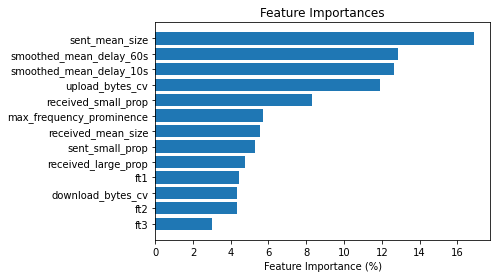

In [6]:
sorted_idx = loaded_model.feature_importances_.argsort()
plt.barh(features[sorted_idx], loaded_model.feature_importances_[sorted_idx] * 100)
plt.xlabel("Feature Importance (%)")
plt.title('Feature Importances');

In [7]:
sorted_idx

array([13, 14, 10,  9,  8,  5,  2,  7, 12,  4,  6,  0,  1, 11,  3])

In [8]:
y_pred = [0, 2, 1, 3, 0, 1, 2, 2, 1, 2, 3, 1, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 0, 2,
 2, 0, 0, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 0, 3, 3, 0, 2, 2, 3, 3, 1, 2,
 3, 1, 2, 0, 2, 2, 3, 0, 3, 3, 2, 2, 0, 0, 0, 0, 0, 1, 3, 2, 1, 3, 0, 2,
 2, 2, 3, 2, 2, 2, 0, 1, 2, 0, 3, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3, 1,
 2, 0, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 0, 1, 3,
 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 0, 0, 1, 2, 3,
 2, 0, 0, 2, 0, 1, 2, 3, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2, 3, 3, 3, 2, 0,
 1, 3, 3, 3, 3, 2, 1, 0, 0, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 2, 0, 1, 0, 2,
 2, 3, 2, 2, 2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 3, 3, 3,
 0, 1, 3, 3, 2, 1, 1, 3, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1,
 2, 1, 1, 3, 1, 3, 1, 0, 2, 2, 1, 0, 1, 2, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3,
 1, 2, 2, 0, 2, 2, 3, 2, 3, 3, 1, 2, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 3, 1,
 3, 2, 2, 3, 1, 0, 1, 0, 0, 2, 1, 1, 3, 2, 3, 0, 1, 3, 2, 2, 3, 2, 1, 0,
 3, 3, 1, 0, 0, 2, 2, 1, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 3,
 2, 1, 1, 1, 0, 0, 2, 1, 3, 1, 0, 3, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 0, 3,
 0, 3, 1, 0, 2, 2, 0, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 3, 3, 2, 1, 1, 0, 1,
 2, 2, 1, 2, 1, 3, 3, 2, 1, 0, 3, 2, 2, 3, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2,
 2, 3, 0, 0, 0, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 2, 2, 2, 1, 2,
 0, 1, 1, 2, 3, 2, 3, 3, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 3, 0, 3, 2, 3,
 0, 2, 2, 0, 0, 3, 3, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 0, 2, 0, 2, 3,
 3, 3, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 3, 1, 1, 1, 0, 2, 1,
 0, 2, 0, 0, 2, 3, 1, 2, 1, 0, 2, 2, 2, 3, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1,
 3, 2, 0, 3, 1, 0, 3, 3, 2, 0, 1, 0, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 0, 3,
 3, 2, 1, 0, 1, 2, 1, 3, 3, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0,]

In [9]:
y_test = [0, 2, 1, 3, 0, 1, 2, 2, 0, 2, 3, 1, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 0, 2,
 2, 0, 0, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 0, 3, 3, 0, 2, 2, 3, 3, 1, 2,
 3, 1, 2, 0, 2, 2, 3, 0, 3, 3, 2, 2, 0, 3, 0, 0, 0, 1, 3, 2, 1, 3, 0, 2,
 2, 2, 3, 2, 2, 2, 0, 1, 2, 0, 3, 3, 2, 1, 3, 0, 3, 3, 2, 2, 2, 1, 1, 1,
 2, 0, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 2, 3, 3, 0, 1, 3,
 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 0, 0, 1, 2, 3,
 2, 0, 0, 2, 0, 1, 2, 3, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2, 3, 3, 3, 2, 0,
 1, 3, 3, 3, 3, 2, 1, 0, 0, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 2, 0, 1, 0, 2,
 2, 3, 2, 2, 2, 2, 3, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 3, 3, 3,
 0, 1, 3, 3, 2, 1, 1, 3, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1,
 2, 1, 1, 3, 1, 3, 3, 0, 0, 2, 1, 0, 1, 2, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3,
 1, 2, 2, 0, 2, 2, 3, 2, 3, 3, 0, 2, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 3, 1,
 3, 2, 2, 3, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 3, 2, 2, 3, 2, 0, 0,
 3, 3, 1, 0, 0, 2, 2, 1, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 3,
 2, 1, 1, 1, 0, 0, 2, 1, 3, 1, 0, 3, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 0, 3,
 0, 3, 1, 0, 2, 2, 0, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 3, 3, 2, 1, 1, 0, 1,
 2, 2, 1, 2, 1, 3, 3, 2, 1, 0, 3, 2, 0, 3, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2,
 2, 3, 0, 0, 0, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 2, 2, 2, 1, 2,
 0, 1, 1, 2, 3, 2, 3, 3, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 3, 2, 3,
 0, 2, 2, 0, 0, 3, 3, 3, 0, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 0, 2, 0, 2, 3,
 3, 3, 2, 1, 1, 0, 2, 2, 0, 1, 3, 1, 1, 0, 1, 2, 0, 3, 1, 1, 0, 0, 2, 1,
 0, 2, 0, 0, 2, 3, 1, 2, 1, 0, 2, 2, 2, 3, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1,
 3, 2, 0, 3, 1, 0, 3, 3, 2, 0, 1, 0, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 0, 3,
 3, 2, 1, 0, 1, 2, 1, 3, 3, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0,]

In [11]:
from sklearn.metrics import classification_report
target_names = ['youtube', 'amazonprime', 'netflix', 'other']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     youtube       0.98      0.95      0.96       128
 amazonprime       0.95      0.98      0.96       124
     netflix       0.98      0.99      0.99       196
       other       0.98      0.97      0.97       124

    accuracy                           0.97       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.97      0.97      0.97       572



In [15]:
loaded_model.

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>